In [51]:
import numpy as np
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from sklearn import manifold
from sklearn.decomposition import PCA

In [30]:
def unpickle(file):
    import pickle
    with open(file, 'rb') as fo:
        dict = pickle.load(fo, encoding='bytes')
    return dict

In [32]:
data_batch=[]
for i in range(1,6):
    data_batch.append(unpickle('cifar-10-batches-py/data_batch_'+str(i)))
data_batch.append(unpickle('cifar-10-batches-py/test_batch'))

In [126]:
label_names=unpickle('cifar-10-batches-py/batches.meta')[b'label_names']
label_names

b'airplane'

In [36]:
data=[]
for i in range(len(data_batch)):
    data=np.append(data,data_batch[i][b'data'])
data=np.reshape(data,(60000,3072))
data.shape

(60000, 3072)

In [38]:
labels=np.array([],dtype=int)
for i in range(len(data_batch)):
    labels=np.append(labels,data_batch[i][b'labels'])
labels=np.reshape(labels,60000)
labels=np.array(labels,dtype=int)
len(labels)

60000

In [40]:
dataByCat=[[],[],[],[],[],[],[],[],[],[]] 
for ind,l in enumerate(labels):
    dataByCat[l].append(data[ind])

In [42]:
def printImage(data):
    r=data[:1024]
    g=data[1024:2048]
    b=data[2048:]
    new_r=np.reshape(r,(32,32))
    new_g=np.reshape(g,(32,32))
    new_b=np.reshape(b,(32,32))
    im=np.dstack((new_r,new_g,new_b))
    im /= 255
    plt.imshow(im)
    plt.show()

In [44]:
mean_images=[]

for cat in range(len(dataByCat)):
    mean_images.append(np.mean(dataByCat[cat], axis = 0))

In [46]:
for cat in range(len(dataByCat)):
    pca=PCA(n_components=20)
    pca_20 = pca.fit_transform(dataByCat[cat])
    im_first_20 = pca.inverse_transform(pca_20)
    difference = im_first_20 - dataByCat[cat]
    difference *= difference
    error = sum(sum(difference)) / len(dataByCat[cat])
    print(error)

2620527.7973
3950698.84936
2447704.4688
3116649.40523
2180405.36393
3231150.61086
2630249.52974
3441170.69727
2440639.11734
4021103.15504


In [142]:
def create_euclidean_distance_matrix(mean_images):
    dis_matrix = np.zeros((len(mean_images), len(mean_images)))
    for label_x, image_x in enumerate(mean_images):
        for label_y, image_y in enumerate(mean_images):
            temp_image = image_x - image_y
            dis_matrix[label_x][label_y] = np.linalg.norm(temp_image, ord=2)
    return dis_matrix
        

In [143]:
similarities = create_euclidean_distance_matrix(mean_images)
mds = manifold.MDS(n_components = 2, dissimilarity = "precomputed")
pos = mds.fit_transform(similarities)

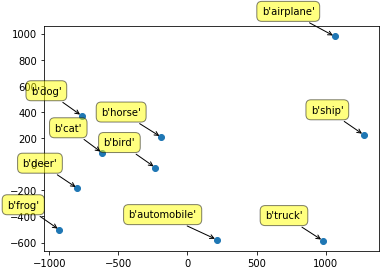

In [141]:
plt.subplots_adjust(bottom = 0.1)
plt.scatter(
    pos[:, 0], pos[:, 1], marker='o')

for label, x, y in zip(label_names, pos[:, 0], pos[:, 1]):
    plt.annotate(
        label,
        xy=(x, y), xytext=(-20, 20),
        textcoords='offset points', ha='right', va='bottom',
        bbox=dict(boxstyle='round,pad=0.5', fc='yellow', alpha=0.5),
        arrowprops=dict(arrowstyle = '->', connectionstyle='arc3,rad=0'))

plt.show()